In [1]:
import xarray as xr
import numpy as np
import datetime as dt
import warnings
#Ignore UserWarning from xarray
warnings.filterwarnings("ignore", category=UserWarning)
import ipywidgets as widgets
from IPython.display import display

In [2]:
flight = 'rf01'
project = 'CAESAR'
output_filename = f'/scr/raf_data/{project}/{project}{flight}_merge.nc'


In [13]:
fill_value = int(-32767)


In [4]:
icartt= xr.open_dataset(f'/scr/raf_data/{project}/test.nc')
flight = xr.open_dataset(f'/scr/raf_data/{project}/{project}{flight}.nc')

In [5]:
icartt_attrs = set(icartt.attrs.keys())
flight_attrs = set(flight.attrs.keys())
unique_attrs = icartt_attrs-flight_attrs

In [6]:
def calculate_range(ds,v):
    minim = ds[v].min().values
    maxim = ds[v].max().values
    return np.array([minim,maxim],dtype='float32')

In [7]:
for var in icartt.data_vars:
    for attribute in unique_attrs:
        icartt[var].attrs[attribute] = icartt.attrs[attribute]


In [8]:
##Merges data and drops variables that are in the icartt file from the flight file
##merged =xr.merge([flight.drop_vars(list(icartt.data_vars)), icartt])

In [9]:
mflight = flight.copy()
saved_attrs ={}
for var in list(icartt.data_vars):
    if var in list(flight.data_vars):
        print(f'{var} variables already exist in flight file')
        response = input('Would you like to overwrite it? (yes/no): ')
        if response.lower() == 'yes':
            print('Dropping variable from flight file')
            print('Saving existing variable attributes')
            saved_attrs[var] = mflight[var].attrs
            mflight = mflight.drop_vars(var)
        else:
            print('Keeping existing variable')

merged = xr.merge([mflight, icartt])
for var in saved_attrs:
    merged[var].attrs.update(saved_attrs[var])

CO_ARI variables already exist in flight file
Dropping variable from flight file
Saving existing variable attributes
N2O_ARI variables already exist in flight file
Dropping variable from flight file
Saving existing variable attributes
H2O_ARI variables already exist in flight file
Dropping variable from flight file
Saving existing variable attributes
FO3_ACD variables already exist in flight file
Dropping variable from flight file
Saving existing variable attributes


In [14]:
encoding = {var: {'_FillValue': fill_value} for var in merged.data_vars}
merged.to_netcdf('test_merge.nc', encoding=encoding)

In [10]:
for var in icartt.data_vars:
    merged[var].attrs['actual_range']=calculate_range(merged,var)

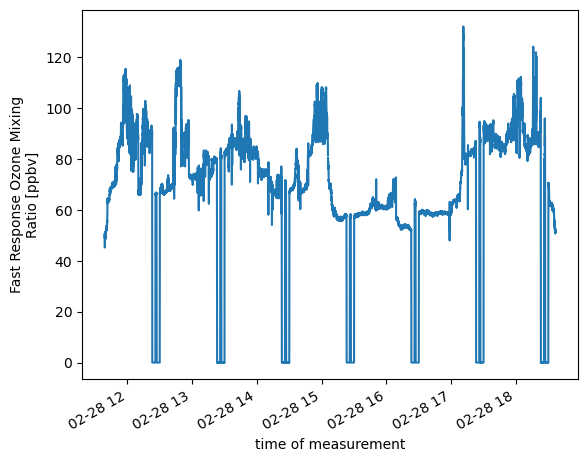

In [57]:
flight.FO3_ACD.plot()

In [17]:
merged.FO3_ACD

<xarray.DataArray 'FO3_ACD' (Time: 25065)>
array([  nan,   nan,   nan, ..., 49.16, 49.22, 49.18], dtype=float32)
Coordinates:
  * Time     (Time) datetime64[ns] 2024-02-28T11:39:00 ... 2024-02-28T18:36:44
Attributes:
    units:                   ppbv
    long_name:               Fast Response Ozone Mixing Ratio
    DateConvertedFromASCII:  Oct 02 16:10 GMT 2024
    Source:                  National Center for Atmospheric Research
    SNAME:                   CON2OH2O - Aerodyne CS-108 miniQCL carbon monoxi...
    ProjectName:             CAESAR
    PI:                      Teresa Campos, Ed Kosciuch, Kirk Ullmann, and Pa...
    DateProcessed:           09/30/2024
    actual_range:            [  0.82 102.24]
    Category:                Chemistry
    SampledRate:             10
    DataQuality:             Preliminary

In [19]:
icartt.FO3_ACD

<xarray.DataArray 'FO3_ACD' (Time: 25004)>
[25004 values with dtype=float32]
Coordinates:
  * Time     (Time) datetime64[ns] 2024-02-28T11:40:01 ... 2024-02-28T18:36:44
Attributes:
    units:                   ppbv
    long_name:               volume_mixing_ratio_of_ozone_in_dry_air
    DateConvertedFromASCII:  Oct 02 16:10 GMT 2024
    Source:                  National Center for Atmospheric Research
    SNAME:                   CON2OH2O - Aerodyne CS-108 miniQCL carbon monoxi...
    ProjectName:             CAESAR
    PI:                      Teresa Campos, Ed Kosciuch, Kirk Ullmann, and Pa...
    DateProcessed:           09/30/2024

In [18]:
flight.FO3_ACD

<xarray.DataArray 'FO3_ACD' (Time: 25065)>
[25065 values with dtype=float32]
Coordinates:
  * Time     (Time) datetime64[ns] 2024-02-28T11:39:00 ... 2024-02-28T18:36:44
Attributes:
    units:         ppbv
    long_name:     Fast Response Ozone Mixing Ratio
    actual_range:  [  0.  132.1]
    Category:      Chemistry
    SampledRate:   10
    DataQuality:   Preliminary

In [85]:
merged.FO3_ACD.attrs['_FillValue'] = -32767.